<a href="https://colab.research.google.com/github/NataliiaHromyk/HomeWork_Python_DS/blob/main/Hromyk_%22HW_2_2_%D0%9D%D0%B5%D0%B7%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%BE%D0%B2%D0%B0%D0%BD%D0%B0_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D0%BE%D0%BA%D0%BB%D0%B0%D1%81%D0%BE%D0%B2%D0%B0_%D0%BA%D0%BB%D0%B0%D1%81%D0%B8%D1%84%D1%96%D0%BA%D0%B0%D1%86%D1%96%D1%8F_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

У цьому ДЗ ми потренуємось розв'язувати задачу багатокласової класифікації за допомогою логістичної регресії з використанням стратегій One-vs-Rest та One-vs-One, оцінити якість моделей та порівняти стратегії.

### Опис задачі і даних

**Контекст**

В цьому ДЗ ми працюємо з даними про сегментацію клієнтів.

Сегментація клієнтів – це практика поділу бази клієнтів на групи індивідів, які схожі між собою за певними критеріями, що мають значення для маркетингу, такими як вік, стать, інтереси та звички у витратах.

Компанії, які використовують сегментацію клієнтів, виходять з того, що кожен клієнт є унікальним і що їхні маркетингові зусилля будуть більш ефективними, якщо вони орієнтуватимуться на конкретні, менші групи зі зверненнями, які ці споживачі вважатимуть доречними та які спонукатимуть їх до купівлі. Компанії також сподіваються отримати глибше розуміння уподобань та потреб своїх клієнтів з метою виявлення того, що кожен сегмент цінує найбільше, щоб точніше адаптувати маркетингові матеріали до цього сегменту.

**Зміст**.

Автомобільна компанія планує вийти на нові ринки зі своїми існуючими продуктами (P1, P2, P3, P4 і P5). Після інтенсивного маркетингового дослідження вони дійшли висновку, що поведінка нового ринку схожа на їхній існуючий ринок.

На своєму існуючому ринку команда з продажу класифікувала всіх клієнтів на 4 сегменти (A, B, C, D). Потім вони здійснювали сегментовані звернення та комунікацію з різними сегментами клієнтів. Ця стратегія працювала для них надзвичайно добре. Вони планують використати ту саму стратегію на нових ринках і визначили 2627 нових потенційних клієнтів.

Ви маєте допомогти менеджеру передбачити правильну групу для нових клієнтів.

В цьому ДЗ використовуємо дані `customer_segmentation_train.csv`[скачати дані](https://drive.google.com/file/d/1VU1y2EwaHkVfr5RZ1U4MPWjeflAusK3w/view?usp=sharing). Це `train.csv`з цього [змагання](https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation/data?select=train.csv)

**Завдання 1.** Завантажте та підготуйте датасет до аналізу. Виконайте обробку пропущених значень та необхідне кодування категоріальних ознак. Розбийте на тренувальну і тестувальну вибірку, де в тесті 20%. Памʼятаємо, що весь препроцесинг ліпше все ж тренувати на тренувальній вибірці і на тестувальній лише використовувати вже натреновані трансформери.
Але в даному випадку оскільки значень в категоріях небагато, можна зробити обробку і на оригінальних даних, а потім розбити - це простіше. Можна також реалізувати процесинг і тренування моделі з пайплайнами. Обирайте як вам зручніше.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls drive/MyDrive/ML_files

application_data.csv.zip
application_data_processed_hw.zip
application_data_processed.zip
cars.csv
columns_description.csv
customer_segmentation_train.csv
estimation_of_obesity_levels_based_on_eating_habits_and_physical.csv
medical-charges.csv
previous_application.csv.zip
regression_data.csv


In [4]:
# Завантажимо дані
df = pd.read_csv('drive/MyDrive/ML_files/customer_segmentation_train.csv')
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [5]:
df.nunique()

,0
ID,8068
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,9
Work_Experience,15
Spending_Score,3
Family_Size,9
Var_1,7


In [6]:
df.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [7]:
df.isnull().values.any()

np.True_

In [8]:
df.columns[df.isnull().any()]

Index(['Ever_Married', 'Graduated', 'Profession', 'Work_Experience',
       'Family_Size', 'Var_1'],
      dtype='object')

In [9]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [10]:
df.shape[0]

8068

In [11]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [12]:
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
6,Work_Experience,829,10.28
8,Family_Size,335,4.15
2,Ever_Married,140,1.74
5,Profession,124,1.54
4,Graduated,78,0.97
9,Var_1,76,0.94
0,ID,0,0.00
1,Gender,0,0.00
3,Age,0,0.00
7,Spending_Score,0,0.00


нульові значення Work_Experience = 10%

In [13]:
df['Work_Experience'].value_counts()

,count
Work_Experience,
1.0,2354
0.0,2318
9.0,474
8.0,463
2.0,286
3.0,255
4.0,253
6.0,204
7.0,196


In [14]:
#Work_Experience заповнюємо медіаною
df['Work_Experience'].fillna(value = df.Work_Experience.median(), inplace = True)

/tmp/ipython-input-14-251949113.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work_Experience'].fillna(value = df.Work_Experience.median(), inplace = True)


нульові значення Family_Size = 4%
більше всього, якщо розмір сімЇ не заповнений, то к-сть  =  1

In [15]:
df['Family_Size'].value_counts()

,count
Family_Size,
2.0,2390
3.0,1497
1.0,1453
4.0,1379
5.0,612
6.0,212
7.0,96
8.0,50
9.0,44


In [16]:
#Family_Size заповнюємо 1
df['Family_Size'].fillna(value = 1, inplace = True)

/tmp/ipython-input-16-3597316964.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family_Size'].fillna(value = 1, inplace = True)


Ever_Married = 2%. Заповнимо нулями, бо зазвиччай не одружені можуть пропустити дане поле

In [17]:
df['Ever_Married'].value_counts()

,count
Ever_Married,
Yes,4643
No,3285


In [18]:
#Ever_Married заповнюємо 0
df['Ever_Married'].fillna(value = 'No', inplace = True)

/tmp/ipython-input-18-4258777727.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ever_Married'].fillna(value = 'No', inplace = True)


 Profession = 2%. Заповнимо Undefined

In [19]:
df['Profession'].value_counts()

,count
Profession,
Artist,2516
Healthcare,1332
Entertainment,949
Engineer,699
Doctor,688
Lawyer,623
Executive,599
Marketing,292
Homemaker,246


In [20]:
#Profession заповнюємо 0
df['Profession'].fillna(value = 'Undefined', inplace = True)

/tmp/ipython-input-20-3886119004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Profession'].fillna(value = 'Undefined', inplace = True)


 Graduated = 1%. Заповнимо найчастіше повторюваним значенням

In [21]:
df['Graduated'].value_counts()

,count
Graduated,
Yes,4968
No,3022


In [22]:
#Graduated заповнюємо найчастіше повторюваним значенням
df['Graduated'].fillna(value = 'Yes', inplace = True)

/tmp/ipython-input-22-2237037517.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Graduated'].fillna(value = 'Yes', inplace = True)


Var_1 заповнюємо найчастіше повторюваним значенням

In [23]:
df['Var_1'].value_counts()

,count
Var_1,
Cat_6,5238
Cat_4,1089
Cat_3,822
Cat_2,422
Cat_7,203
Cat_1,133
Cat_5,85


In [24]:
# Var_1 заповнюємо найчастіше повторюваним значенням
df['Var_1'].fillna(value = 'Cat_6', inplace = True)

/tmp/ipython-input-24-3721129014.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Var_1'].fillna(value = 'Cat_6', inplace = True)


In [25]:
df['Gender_Male_code'] = df.Gender.map({'Female': 0, 'Male': 1})
df['Ever_Married_code'] = df.Ever_Married.map({'No': 0, 'Yes': 1})
df['Graduated_code'] = df.Graduated.map({'No': 0, 'Yes': 1})
df['Var_1_code'] = df.Var_1.map({'Cat_1': 1, 'Cat_2': 2, 'Cat_3': 3, 'Cat_4': 4, 'Cat_5': 5, 'Cat_6': 6, 'Cat_7': 7})
df['Segmentation'] = df.Segmentation.map({'A': 1, 'B': 2, 'C': 3, 'D': 4})

In [26]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Male_code,Ever_Married_code,Graduated_code,Var_1_code
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4,1,0,0,4
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,1,0,1,1,4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2,0,1,1,6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2,1,1,1,6
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Undefined,0.0,Low,7.0,Cat_1,4,1,0,0,1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,4,1,0,0,4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,4,0,0,1,6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,2,0,0,1,6


In [27]:
model_df = df
model_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Gender_Male_code,Ever_Married_code,Graduated_code,Var_1_code
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,4,1,0,0,4
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,1,0,1,1,4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2,0,1,1,6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2,1,1,1,6
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,1,0,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Undefined,0.0,Low,7.0,Cat_1,4,1,0,0,1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,4,1,0,0,4
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,4,0,0,1,6
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,2,0,0,1,6


In [28]:
onehot_col = ['Profession', 'Spending_Score']

In [29]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(model_df[['Profession']])
enc.categories_

[array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Undefined'],
       dtype=object)]

In [30]:
one_hot = enc.transform(model_df[['Profession']]).toarray()
one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
enc.categories_

[array(['Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
        'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Undefined'],
       dtype=object)]

In [32]:
model_df[enc.categories_[0]] = one_hot
model_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Undefined
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Undefined,0.0,Low,7.0,Cat_1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [33]:
enc = preprocessing.OneHotEncoder()
enc.fit(model_df[['Spending_Score']])
one_hot = enc.transform(model_df[['Spending_Score']]).toarray()
model_df[enc.categories_[0]] = one_hot
model_df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,Undefined,Average,High,Low
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Undefined,0.0,Low,7.0,Cat_1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
model_df.nunique()

,0
ID,8068
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,10
Work_Experience,15
Spending_Score,3
Family_Size,9
Var_1,7


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Розділимо дані на тренувальні та тестові набори
X = model_df.select_dtypes(include="number").drop(columns = ['ID'])
y = model_df['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
model_column = ['Age','Work_Experience','Family_Size','Gender_Male_code','Ever_Married_code','Graduated_code','Var_1_code','Artist','Doctor','Engineer','Entertainment','Executive','Healthcare','Homemaker','Lawyer','Marketing','Undefined','Average','High','Low']
model_targets = ['Segmentation']

**Завдання 2. Важливо уважно прочитати все формулювання цього завдання до кінця!**

Застосуйте методи ресемплингу даних SMOTE та SMOTE-Tomek з бібліотеки imbalanced-learn до тренувальної вибірки. В результаті у Вас має вийти 2 тренувальних набори: з апсемплингом зі SMOTE, та з ресамплингом з SMOTE-Tomek.

Увага! В нашому наборі даних є як категоріальні дані, так і звичайні числові. Базовий SMOTE не буде правильно працювати з категоріальними даними, але є його модифікація, яка буде. Тому в цього завдання є 2 виконання

  1. Застосувати SMOTE базовий лише на НЕкатегоріальних ознаках.

  2. Переглянути інформацію про метод [SMOTENC](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC) і використати цей метод в цій задачі. За цей спосіб буде +3 бали за це завдання і він рекомендований для виконання.

  **Підказка**: аби скористатись SMOTENC треба створити змінну, яка містить індекси ознак, які є категоріальними (їх номер серед колонок) і передати при ініціації екземпляра класу `SMOTENC(..., categorical_features=cat_feature_indeces)`.
  
  Ви також можете розглянути варіант використання варіації SMOTE, який працює ЛИШЕ з категоріальними ознаками [SMOTEN](https://imbalanced-learn.org/dev/references/generated/imblearn.over_sampling.SMOTEN.html)

In [67]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the dataset on both train and test sets.
# Note that we fit MinMaxScaler on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA Decomposition on both train and test sets
# Note that we fit PCA on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [39]:
import numpy as np

def plot_decision_boundaries(X, y, clf, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o', s=20)
    ax.set_title(title)
    return scatter

In [40]:
!pip install -U imbalanced-learn

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# Train SVC on original data
clf = SVC(kernel='linear',probability=True)
clf.fit(X_train_pca, y_train)

# Perform random sampling
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Train linear SVC
clf_smote = SVC(kernel='linear',probability=True)
clf_smote.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', probability=True)

In [42]:
y_train_smote.value_counts()

,count
Segmentation,
1,1814
2,1814
3,1814
4,1814


In [43]:
test = pd.DataFrame(X_train_smote)
test['target'] = y_train_smote
original  = pd.DataFrame(X_train_pca)

In [44]:
test.merge(pd.DataFrame(X_train_pca), how='left', left_on=0, right_on=0).sort_values([0,'1_x'])

,0,1_x,target,1_y
499,-1.276951,0.340384,1,0.340384
5146,-1.259251,0.334211,1,0.334211
1293,-1.255242,0.323135,1,0.323135
4828,-1.249134,0.364366,1,0.364366
3242,-1.240889,0.331480,1,0.331480
...,...,...,...,...
3582,1.285138,-0.216298,4,-0.216298
3302,1.286217,-0.195290,4,-0.195290
2224,1.288646,-0.229794,4,-0.229794
1014,1.290331,-0.165200,4,-0.165200


In [45]:
print(type(X_train_pca), X_train_pca.dtype)
print(type(y_train), y_train.dtype if hasattr(y_train, 'dtype') else type(y_train[0]))

<class 'numpy.ndarray'> float64
<class 'pandas.core.series.Series'> int64


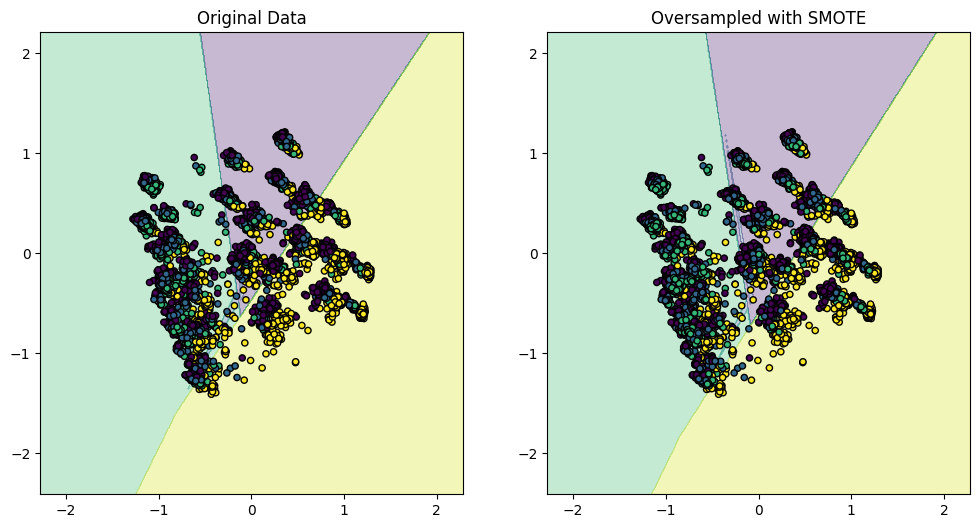

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plot_decision_boundaries(X_train_pca, y_train, clf, axes[0], "Original Data")
plot_decision_boundaries(X_train_smote, y_train_smote, clf_smote, axes[1], "Oversampled with SMOTE");

SMOTE TOMEK

In [47]:
from imblearn.combine import SMOTETomek
from sklearn.svm import LinearSVC

smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_pca, y_train)

clf_smotetomek = SVC(kernel='linear',probability=True)
clf_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)


SVC(kernel='linear', probability=True)

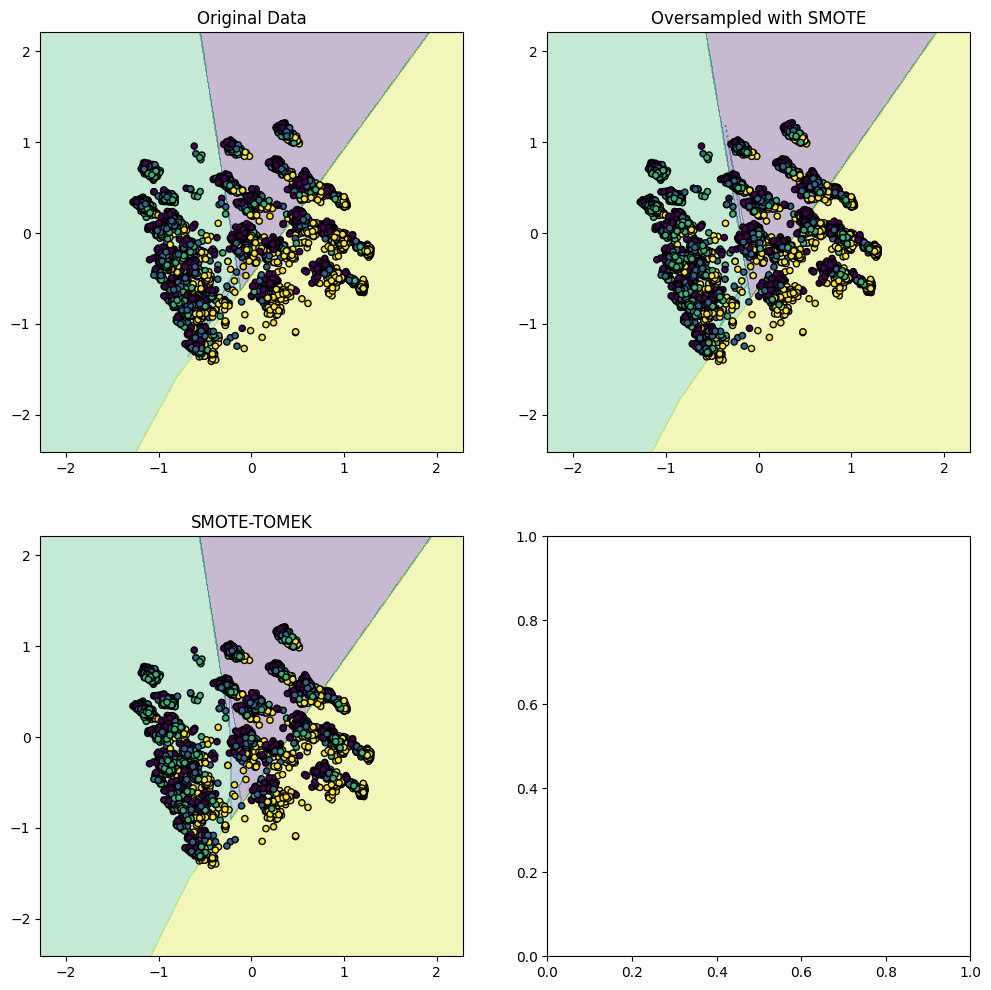

In [48]:
# Plot decision boundary
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
plot_decision_boundaries(X_train_pca, y_train, clf, axes[0][0], "Original Data")
plot_decision_boundaries(X_train_smote, y_train_smote, clf_smote, axes[0][1], "Oversampled with SMOTE")
plot_decision_boundaries(X_train_smotetomek, y_train_smotetomek, clf_smotetomek, axes[1][0], "SMOTE-TOMEK");

для категоріальних колонок

In [49]:
# Завантажимо дані
df2 = pd.read_csv('drive/MyDrive/ML_files/customer_segmentation_train.csv')
df2.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [50]:
model_df[df2.columns].select_dtypes(include="object").columns.tolist()

['Gender',
 'Ever_Married',
 'Graduated',
 'Profession',
 'Spending_Score',
 'Var_1']

In [51]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTENC

# Приклад датафрейму
df_sm = model_df[df2.columns]

# Визначаємо X та y
X = df_sm.drop('Segmentation', axis=1)
y = df_sm['Segmentation']

# Кодуємо категоріальні ознаки
categorical_cols = model_df[df2.columns].select_dtypes(include="object").columns.tolist()
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols]

encoder = OrdinalEncoder()
X[categorical_cols] = encoder.fit_transform(X[categorical_cols])

# Застосовуємо SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_smote_nc, y_smote_nc = smote_nc.fit_resample(X, y)

# Результат
X_smote_nc = pd.DataFrame(X_smote_nc, columns=X.columns)
y_smote_nc = pd.Series(y_smote_nc, name='Segmentation')


**Завдання 3**.
  1. Навчіть модель логістичної регресії з використанням стратегії One-vs-Rest з логістичною регресією на оригінальних даних, збалансованих з SMOTE, збалансованих з Smote-Tomek.  
  2. Виміряйте якість кожної з натренованих моделей використовуючи `sklearn.metrics.classification_report`.
  3. Напишіть, яку метрику ви обрали для порівняння моделей.
  4. Яка модель найкраща?
  5. Якщо немає суттєвої різниці між моделями - напишіть свою гіпотезу, чому?

In [52]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, precision_score, recall_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [55]:
# Логістична регресія зі стратегією one-vs-rest (OvR)
log_reg = LogisticRegression(solver='liblinear')
ovr_model = OneVsRestClassifier(log_reg)
ovr_model.fit(X_train_pca, y_train)
ovr_predictions = ovr_model.predict(X_test_pca)

# Обчислимо метрики precision та recall для кожного класу
print(classification_report(y_test, ovr_predictions))

              precision    recall  f1-score   support

           1       0.44      0.32      0.37       394
           2       0.33      0.00      0.01       372
           3       0.41      0.69      0.52       394
           4       0.60      0.87      0.71       454

    accuracy                           0.49      1614
   macro avg       0.45      0.47      0.40      1614
weighted avg       0.45      0.49      0.42      1614



In [56]:
# Логістична регресія зі стратегією one-vs-one (OvO)
ovo_model = OneVsOneClassifier(log_reg)
ovo_model.fit(X_train_pca, y_train)
ovo_predictions = ovo_model.predict(X_test_pca)

# Обчислимо метрики precision та recall для кожного класу
print(classification_report(y_test, ovo_predictions))


              precision    recall  f1-score   support

           1       0.42      0.37      0.39       394
           2       0.30      0.02      0.04       372
           3       0.43      0.69      0.53       394
           4       0.61      0.84      0.71       454

    accuracy                           0.50      1614
   macro avg       0.44      0.48      0.42      1614
weighted avg       0.45      0.50      0.43      1614



In [57]:
# Логістична регресія зі стратегією one-vs-rest (OvR) - з використанням smote
log_reg = LogisticRegression(solver='liblinear')
ovr_model = OneVsRestClassifier(log_reg)
ovr_model.fit(X_train_smote, y_train_smote)
ovr_predictions = ovr_model.predict(X_test_pca)

# Обчислимо метрики precision та recall для кожного класу
print(classification_report(y_test, ovr_predictions))

              precision    recall  f1-score   support

           1       0.39      0.30      0.34       394
           2       0.18      0.02      0.04       372
           3       0.42      0.69      0.52       394
           4       0.61      0.85      0.71       454

    accuracy                           0.48      1614
   macro avg       0.40      0.46      0.40      1614
weighted avg       0.41      0.48      0.42      1614



In [58]:
# Логістична регресія зі стратегією one-vs-rest (OvR) - з використанням smotetomek
log_reg = LogisticRegression(solver='liblinear')
ovr_model = OneVsRestClassifier(log_reg)
ovr_model.fit(X_train_smotetomek, y_train_smotetomek)
ovr_predictions = ovr_model.predict(X_test_pca)

# Обчислимо метрики precision та recall для кожного класу
print(classification_report(y_test, ovr_predictions))

              precision    recall  f1-score   support

           1       0.41      0.31      0.35       394
           2       0.17      0.01      0.02       372
           3       0.42      0.69      0.52       394
           4       0.61      0.85      0.71       454

    accuracy                           0.49      1614
   macro avg       0.40      0.47      0.40      1614
weighted avg       0.41      0.49      0.42      1614



Виявила дуже погану якість даної моделі, тому пропоную не використовувати PCA (з n вимірного масиву перетворювати у двовимірний) і користуватись всіма полями, що у нас є для аналізу :)

In [59]:
# Логістична регресія зі стратегією one-vs-rest (OvR) на класичних даних
log_reg = LogisticRegression(solver='liblinear')
ovr_model = OneVsRestClassifier(log_reg)
ovr_model.fit(X_train, y_train)
ovr_predictions = ovr_model.predict(X_test)

# Обчислимо метрики precision та recall для кожного класу
print(classification_report(y_test, ovr_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       394
           2       0.95      0.83      0.89       372
           3       0.84      0.88      0.86       394
           4       0.93      0.99      0.96       454

    accuracy                           0.93      1614
   macro avg       0.93      0.92      0.93      1614
weighted avg       0.93      0.93      0.93      1614



In [60]:
# Логістична регресія зі стратегією one-vs-one (OvO)
ovo_model = OneVsOneClassifier(log_reg)
ovo_model.fit(X_train, y_train)
ovo_predictions = ovo_model.predict(X_test)

# Обчислимо метрики precision та recall для кожного класу
print(classification_report(y_test, ovo_predictions))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       394
           2       1.00      1.00      1.00       372
           3       1.00      1.00      1.00       394
           4       1.00      1.00      1.00       454

    accuracy                           1.00      1614
   macro avg       1.00      1.00      1.00      1614
weighted avg       1.00      1.00      1.00      1614



SMOTE

In [61]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

#SMOTE - на всіх вхідних даних

# Train SVC on original data
clf = SVC(kernel='linear',probability=True)
clf.fit(X_train, y_train)

# Perform random sampling
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train linear SVC
clf_smote = SVC(kernel='linear',probability=True)
clf_smote.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', probability=True)

In [62]:
# Логістична регресія зі стратегією one-vs-rest (OvR) - з використанням smote оригінальних вхідних даних
log_reg = LogisticRegression(solver='liblinear')
ovr_model = OneVsRestClassifier(log_reg)
ovr_model.fit(X_train_smote, y_train_smote)
ovr_predictions = ovr_model.predict(X_test)

# Обчислимо метрики precision та recall для кожного класу
print(classification_report(y_test, ovr_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       394
           2       0.93      0.85      0.89       372
           3       0.85      0.87      0.86       394
           4       0.94      0.99      0.96       454

    accuracy                           0.93      1614
   macro avg       0.93      0.93      0.93      1614
weighted avg       0.93      0.93      0.93      1614



SMOTETomek

In [63]:
from imblearn.combine import SMOTETomek
from sklearn.svm import LinearSVC

#SMOTETomek - на всіх вхідних даних

smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train, y_train)

clf_smotetomek = SVC(kernel='linear',probability=True)
clf_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)


SVC(kernel='linear', probability=True)

In [64]:
# Логістична регресія зі стратегією one-vs-rest (OvR) - з використанням smotetomek всіх вхідних даних
log_reg = LogisticRegression(solver='liblinear')
ovr_model = OneVsRestClassifier(log_reg)
ovr_model.fit(X_train_smotetomek, y_train_smotetomek)
ovr_predictions = ovr_model.predict(X_test)

# Обчислимо метрики precision та recall для кожного класу
print(classification_report(y_test, ovr_predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       394
           2       0.93      0.84      0.88       372
           3       0.84      0.86      0.85       394
           4       0.94      0.99      0.96       454

    accuracy                           0.93      1614
   macro avg       0.93      0.92      0.93      1614
weighted avg       0.93      0.93      0.93      1614



Якщо узагальнено, то РСА я би не використовувала для класифікації, краще застосовувати без нього, бо таким чином  ми втрачаємо якість моделі.
Наступне, дивилась на показники precision, recall  та accuracy - які являються високими і +- подібними у всіх моделях за рахунок того, що класи +- однаково розподілені між собою (лиш у 4(D) присутній приріст), тому теоретично у таких випадках ми можемо просто скористатись методом one-vs-rest

До речі, one-vs-one продемонстрував 100% влучання, тому ми можемо використовувати його:)



In [68]:
model_df['Segmentation'].value_counts()

,count
Segmentation,
4,2268
1,1972
3,1970
2,1858
